In [40]:
from __future__ import print_function
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k

In [41]:
import os 
os.environ['IF_CPP_MIN_LOG_LEVEL']='2'

In [42]:
num_classes = 10

In [43]:
batch_size = 128
epochs = 24

In [44]:
img_rows,img_cols = 28,28

In [45]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [46]:
if k.image_data_format() == 'channels_first':
    
    x_train = x.train.reshape(x_train.shape[0],1,img_rows,img_cols)
    
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    
    input_shape = (1,img_rows,img_cols)
    
else :
    
        x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    
        x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    
        input_shape = (img_rows,img_cols,1)

In [47]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train/= 255

x_test/= 255

In [48]:
y_train = keras.utils.to_categorical(y_train,num_classes)

y_test = keras.utils.to_categorical(y_test,num_classes)

In [49]:
model = Sequential()

In [50]:
 model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

In [12]:
# model.add(MaxPooling2D(pool_size=(2,2)))

In [51]:
 model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

In [52]:
model.add(Flatten())

In [53]:
model.add(Dense(128,activation='relu'))

In [54]:
model.add(Dropout(0.5))

In [55]:
model.add(Dense(num_classes,activation='softmax'))

In [56]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [57]:
hist = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 248s 4ms/step - loss: 0.5974 - acc: 0.7904 - val_loss: 0.3840 - val_acc: 0.8635
Epoch 2/24
60000/60000 [==============================] - 250s 4ms/step - loss: 0.3833 - acc: 0.8650 - val_loss: 0.3517 - val_acc: 0.8712
Epoch 3/24
60000/60000 [==============================] - 244s 4ms/step - loss: 0.3243 - acc: 0.8827 - val_loss: 0.2933 - val_acc: 0.8921
Epoch 4/24
60000/60000 [==============================] - 241s 4ms/step - loss: 0.2850 - acc: 0.8976 - val_loss: 0.2746 - val_acc: 0.9009
Epoch 5/24
60000/60000 [==============================] - 240s 4ms/step - loss: 0.2540 - acc: 0.9076 - val_loss: 0.2721 - val_acc: 0.8970
Epoch 6/24
60000/60000 [==============================] - 240s 4ms/step - loss: 0.2312 - acc: 0.9157 - val_loss: 0.2472 - val_acc: 0.9120
Epoch 7/24
60000/60000 [==============================] - 249s 4ms/step - loss: 0.2111 - acc: 0.9235 - val_loss: 0.2416 - 

In [58]:
import matplotlib.pyplot as plt

In [59]:
epoch_list  = list(range(1,len(hist.history['acc']) + 1 ))

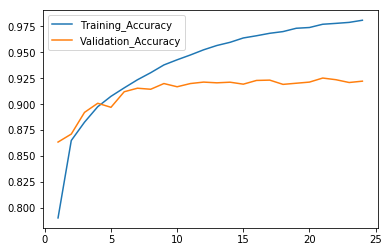

In [60]:
plt.plot(epoch_list,hist.history['acc'],epoch_list,hist.history['val_acc'])
plt.legend(('Training_Accuracy','Validation_Accuracy'))
plt.show()